<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/15_Hyperparameter_Tuning_in_Python/03_Random_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. Random Search


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/credit-card-full.csv"
# Read the CSV file

# Apply pd.to_numeric only to relevant columns, excluding 'text'
speech_df = pd.read_csv(url)


display(speech_df.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Introducing Random Search


**Randomly Sample Hyperparameters**  
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

In [4]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
from itertools import product
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)


# You generated some hyperparameter combinations and randomly sampled in that space.
# The output was not too nice though, in the next lesson we will use a much more efficient method for this.
# In a future lesson we will also make this output look much nicer!

[[np.float64(0.8036683417085427), 25], [np.float64(1.2828643216080402), 31], [np.float64(1.3352763819095477), 17], [np.float64(1.0807035175879396), 10], [np.float64(0.5041708542713568), 40], [np.float64(0.9309547738693467), 33], [np.float64(1.0058291457286432), 11], [np.float64(0.06989949748743718), 18], [np.float64(0.5565829145728644), 10], [np.float64(1.07321608040201), 34], [np.float64(1.0432663316582915), 16], [np.float64(0.945929648241206), 27], [np.float64(0.5490954773869346), 19], [np.float64(1.2678894472361808), 25], [np.float64(1.4326130653266331), 13], [np.float64(0.8635678391959799), 20], [np.float64(0.30201005025125627), 12], [np.float64(0.5341206030150754), 35], [np.float64(0.09984924623115578), 30], [np.float64(0.9084924623115578), 38], [np.float64(0.3094974874371859), 27], [np.float64(1.2753768844221105), 16], [np.float64(0.7063316582914573), 29], [np.float64(0.43678391959798996), 28], [np.float64(0.945929648241206), 40], [np.float64(0.48170854271356783), 38], [np.float6

**Randomly Search with Random Forest**  
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use a slightly different package for sampling in this task, random.sample().



In [6]:
# Create lists for criterion and max_features
criterion_list = ["gini", "entropy"]
max_feature_list = ["auto", "sqrt", "log2", None]


# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
from itertools import product
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
import random
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

#  This one was a bit harder but you managed to sample using text options and learned a new function to sample your lists.

[['entropy', 'sqrt', 43], ['gini', 'sqrt', 22], ['gini', None, 22], ['gini', 'sqrt', 20], ['gini', 'auto', 17], ['gini', 'sqrt', 25], ['entropy', 'auto', 41], ['entropy', 'auto', 39], ['entropy', 'sqrt', 13], ['entropy', 'auto', 50], ['entropy', 'sqrt', 16], ['entropy', 'log2', 47], ['entropy', 'auto', 28], ['gini', 'sqrt', 52], ['gini', 'log2', 34], ['entropy', 'auto', 30], ['entropy', 'sqrt', 22], ['entropy', None, 50], ['entropy', 'sqrt', 28], ['gini', None, 35], ['entropy', 'auto', 31], ['gini', None, 25], ['gini', 'auto', 35], ['gini', None, 44], ['entropy', 'log2', 37], ['entropy', 'log2', 11], ['entropy', None, 15], ['gini', None, 39], ['entropy', None, 40], ['entropy', None, 22], ['gini', 'sqrt', 38], ['gini', None, 50], ['gini', 'auto', 21], ['entropy', None, 28], ['entropy', 'log2', 53], ['entropy', 'auto', 4], ['entropy', 'log2', 3], ['entropy', 'log2', 42], ['gini', None, 19], ['entropy', 'auto', 14], ['entropy', None, 36], ['gini', 'auto', 28], ['entropy', 'sqrt', 10], ['g

**Visualizing a Random Search**  
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function sample_and_visualize_hyperparameters() takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

If you want to see the function definition, you can use Python's handy inspect library, like so:

print(inspect.getsource(sample_and_visualize_hyperparameters))



6200


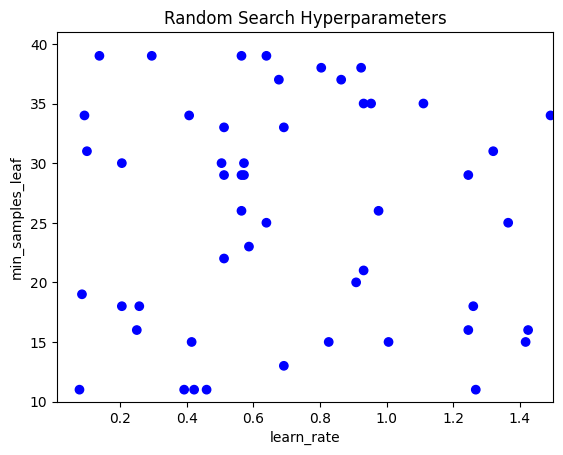

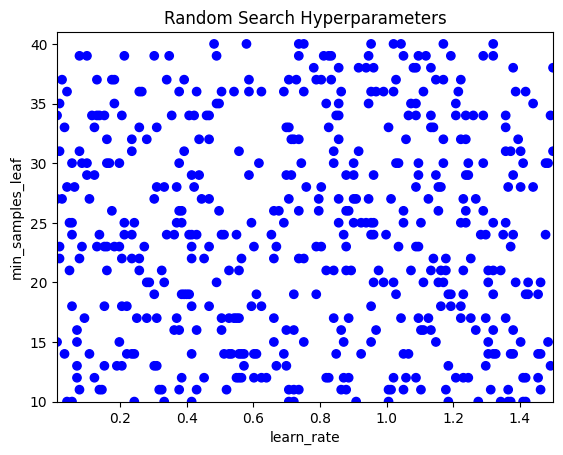

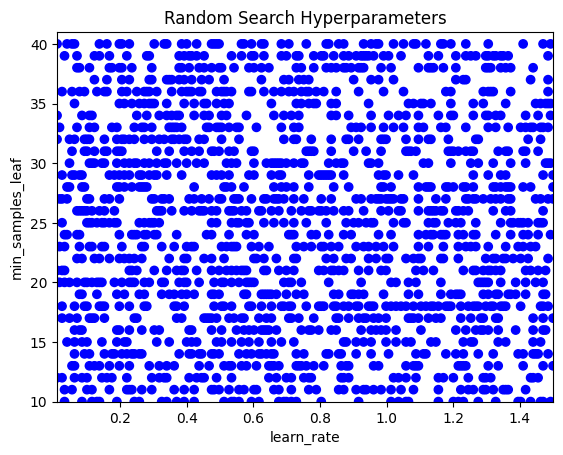

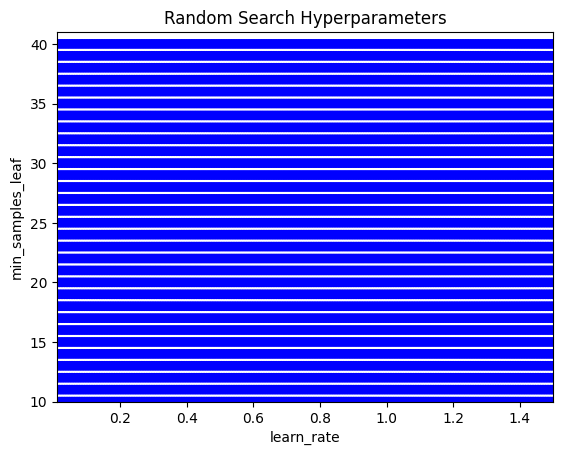

In [12]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

def sample_and_visualize_hyperparameters(n_samples):

  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

  # Plot
  plt.clf()
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)

# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

# Notice how the bigger your sample space of a random search the more it looks like a grid search?
# In a later lesson we will look closer at comparing these two methods side by side.



6200


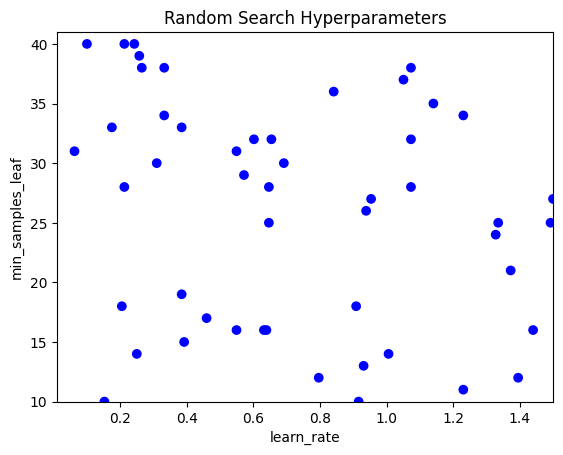

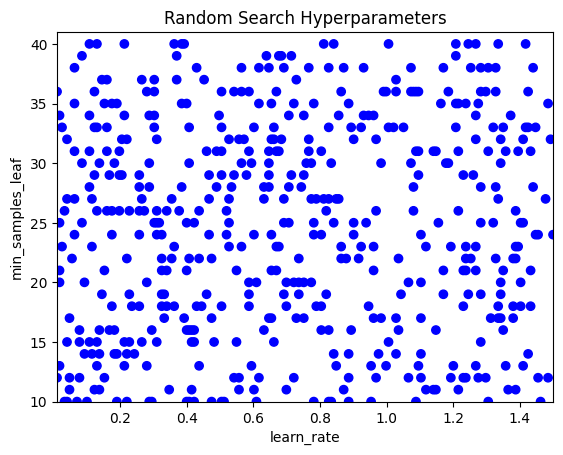

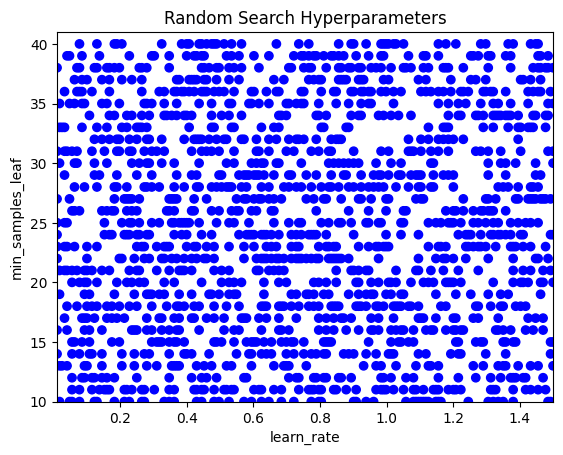

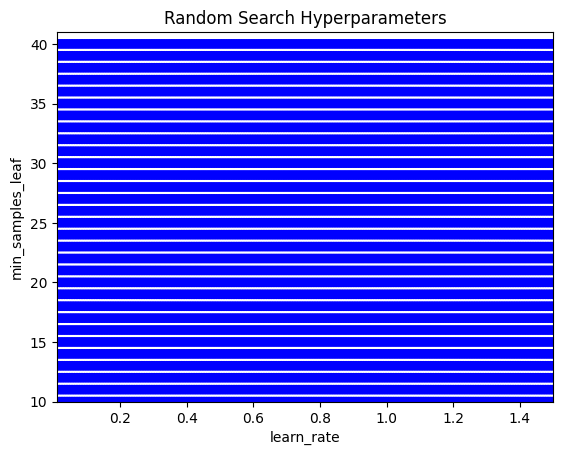

In [11]:
# Define the ranges for the GBM hyperparameters again to ensure combinations_list is correct for this visualization
learn_rate_list = list(np.linspace(0.01, 1.5, 200))
min_samples_list = list(range(10, 41))

# Regenerate combinations_list for GBM hyperparameters
from itertools import product
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]


def sample_and_visualize_hyperparameters(n_samples):
    """
    Randomly samples hyperparameter combinations and visualizes them.

    Args:
        n_samples (int): The number of hyperparameter combinations to sample.
    """
    # Ensure combinations_list, x_lims, and y_lims are defined in the environment
    if 'combinations_list' not in globals():
        print("Error: 'combinations_list' is not defined.")
        return
    if 'x_lims' not in globals() or 'y_lims' not in globals():
         print("Error: 'x_lims' or 'y_lims' are not defined. Please define limits for plotting.")
         return


    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

    # Pull out the X and Y to plot
    # Assuming combinations_list contains pairs of (learn_rate, min_samples_leaf)
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot
    plt.clf()
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim(x_lims)
    plt.gca().set_ylim(y_lims)
    plt.show()

# Define x_lims and y_lims based on the hyperparameter ranges used previously
# learn_rate_list = list(np.linspace(0.01, 1.5, 200))
# min_samples_list = list(range(10, 41))
x_lims = (0.01, 1.5)
y_lims = (10, 41)

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)

# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

# Notice how the bigger your sample space of a random search the more it looks like a grid search?
# In a later lesson we will look closer at comparing these two methods side by side.

RandomSearchCV inputs
Let's test your knowledge of how RandomizedSearchCV differs from GridSearchCV.

You can check the documentation on Scitkit Learn's website to compare these two functions.

Which of these parameters is only for a RandomizedSearchCV?

-> n_iter

**The RandomizedSearchCV Object**  
Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

The desired options are:

- A default Gradient Boosting Classifier Estimator
- 5-fold cross validation
- Use accuracy to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores
- Randomly sample 10 models
- The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64).

In [15]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np # Import numpy if not already imported

# Create features (X) and target (y)
X = speech_df.drop('default payment next month', axis=1)
y = speech_df['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 'min_samples_leaf': list(range(20, 65))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

# You have succesfully taken the knowledge gained from the grid search section and adjusted it to be able to run a random search

[0.31677852348993285 1.5026845637583892 1.7577181208053692
 1.885234899328859 1.8724832214765101 0.9288590604026845
 1.5664429530201343 0.2530201342281879 0.8013422818791945
 0.5335570469798657]
[21 47 43 63 50 55 52 51 59 50]


R**andomSearchCV in Scikit Learn**   
Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

- A RandomForestClassifier Estimator with n_estimators of 80.
- 3-fold cross validation (cv)
- Use roc_auc to score the models
- Use 4 cores for processing in parallel (n_jobs)
- Ensure you refit the best model and return training scores
- Only sample 5 models for efficiency (n_iter)
- X_train & y_train datasets are loaded for you.

Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion.

In [18]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26)), 'max_features': ['auto', 'sqrt']}

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

[18 5 14 6 21]
['auto' 'auto' 'sqrt' 'auto' 'sqrt']


### Comparing Grid and Random Search

In [20]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()


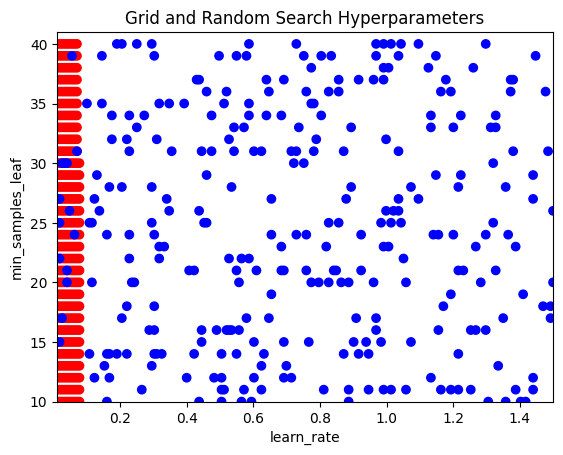

In [21]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

# You can really see how a grid search will cover a small area completely
# whilst random search will cover a much larger area but not completely.